In [1]:
import numpy as np
import pandas as pd
import os, vcf, sys, itertools, shutil, subprocess, glob, yaml
from Bio import Entrez, Seq, SeqIO
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

H37Rv_regions = pd.read_csv("./references/ref_genome/mycobrowser_h37rv_v4.csv")

In [2]:
df = pd.read_csv("~/Mtb_Megapipe/BAM_files_conversion.tsv", sep='\t', header=None)

In [23]:
df.to_csv("~/Mtb_Megapipe/BAM_files_conversion.tsv", sep='\t', header=None, index=False)

In [13]:
# for sample in df.iloc[:12, :][0].values:
#     subprocess.run(f"cp -Rp /n/data1/hms/dbmi/farhat/rollingDB/genomic_data/{sample}/bam/.snapshot/data1_2025-05-06_17_20_04_UTC/{sample}.dedup.bam /n/data1/hms/dbmi/farhat/rollingDB/genomic_data/{sample}/bam/{sample}.dedup.bam", shell=True)

In [22]:
len(df)

17801

In [11]:
PZA_isolates_combined = pd.concat([pd.read_csv(fName, sep='\t', header=None) for fName in glob.glob("PZA_isolates*.tsv")]).reset_index(drop=True)
len(PZA_isolates_combined)

6463

In [59]:
PZA_isolates_combined.query("Num_Reads <= 3").iloc[:int(6433/2), :-1].to_csv("./PZA_isolates_1.tsv", sep='\t', header=None, index=False)
PZA_isolates_combined.query("Num_Reads <= 3").iloc[int(6433/2):, :-1].to_csv("./PZA_isolates_2.tsv", sep='\t', header=None, index=False)

In [60]:
len(PZA_isolates_combined.query("Num_Reads <= 3"))

6433

In [37]:
# PZA_isolates_combined.iloc[:1].to_csv("./PZA_isolates_1.tsv", sep='\t', header=None, index=False)
# PZA_isolates_combined.iloc[-1:].to_csv("./PZA_isolates_2.tsv", sep='\t', header=None, index=False)

In [49]:
len(PZA_isolates_combined), len(PZA_isolates_combined.loc[PZA_isolates_combined[1].str.contains(',')])

(6463, 142)

In [50]:
PZA_isolates_combined['Num_Reads'] = PZA_isolates_combined[1].str.count(',') + 1

In [51]:
PZA_isolates_combined.sort_values("Num_Reads", ascending=False)

,0,1,2,Num_Reads
6462,SAMN11603930,"SRR9028476,SRR9028478,SRR9028479,SRR9028480,SR...",1,13
1884,SAMEA2535310,"ERR2200060,ERR2200061,ERR553328,ERR553329,ERR5...",1,5
1929,SAMEA2534425,"ERR2199766,ERR2199767,ERR552118,ERR552119,ERR5...",1,5
1946,SAMEA2534000,"ERR2199758,ERR2199759,ERR551523,ERR551524,ERR5...",1,5
1948,SAMEA2533861,"ERR2200046,ERR2200047,ERR551329,ERR551330,ERR5...",1,5
...,...,...,...,...
2212,SAMEA104172456,ERR2041712,1,1
2211,SAMEA104172457,ERR2041734,1,1
2208,SAMEA104172460,ERR2041785,1,1
2207,SAMEA104172461,ERR2041796,1,1


In [52]:
PZA_isolates_combined.Num_Reads.value_counts()

Num_Reads
1     6321
2       90
4       23
3       22
5        6
13       1
Name: count, dtype: int64

In [35]:
for i, dir_name in enumerate(glob.glob("/n/scratch/users/s/sak0914/PZA_binary_data/*")):
    sample = os.path.basename(dir_name)
    shutil.move(dir_name, f"/n/data1/hms/dbmi/farhat/rollingDB/genomic_data/{sample}")
    
    if i % 1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000


In [40]:
PZA_isolates_combined.iloc[-1:]

,0,1,2
6462,SAMN11603930,"SRR9028476,SRR9028478,SRR9028479,SRR9028480,SR...",1


In [2]:
who_catalog = pd.read_csv("/home/sak0914/Mtb_Megapipe/references/WHO_catalog_resistance/V2_catalog.csv", header=[2])

In [7]:
who_catalog.loc[who_catalog['FINAL CONFIDENCE GRADING']=='1) Assoc w R'].query("drug=='Ethionamide'")

,drug,gene,mutation,variant,tier,effect,genomic position,algorithm_pass,Present_SOLO_SR,Present_SOLO_R,...,Additional grading criteria applied,FINAL CONFIDENCE GRADING,Comment,CHANGES vs ver1,"Relaxed thresholds simulation (BDQ_Rv0678, CFZ_Rv0678, INH_katG, DLM_ddn/fbiA/fbiB/fbiC/fgd1/Rv2983)",Silent mutation,Listed in abridged tables,Additional grading,Footnote,CHANGES vs ver1.1
16401,Ethionamide,ethA,LoF,ethA_LoF,1,LoF,"(see ""Genomic_coordinates"" sheet)",1.0,1291.0,658.0,...,NaN,1) Assoc w R,NaN,UP from AwRI to AwR,NaN,NaN,yes,NaN,NaN,4
16467,Ethionamide,ethA,p.Arg207Gly,ethA_p.Arg207Gly,1,missense_variant,"(see ""Genomic_coordinates"" sheet)",1.0,57.0,36.0,...,NaN,1) Assoc w R,NaN,No change,NaN,NaN,yes,NaN,NaN,1
16900,Ethionamide,ethA,p.Lys37fs,ethA_p.Lys37fs,1,frameshift,"(see ""Genomic_coordinates"" sheet)",1.0,164.0,81.0,...,NaN,1) Assoc w R,NaN,UP from AwRI to AwR,NaN,NaN,yes,NaN,NaN,4
16906,Ethionamide,ethA,p.Met1?,ethA_p.Met1?,1,start_lost,"(see ""Genomic_coordinates"" sheet)",1.0,99.0,52.0,...,NaN,1) Assoc w R,NaN,UP from AwRI to AwR,NaN,NaN,yes,NaN,NaN,4
17185,Ethionamide,ethA,p.Tyr235fs,ethA_p.Tyr235fs,1,frameshift,"(see ""Genomic_coordinates"" sheet)",1.0,35.0,24.0,...,NaN,1) Assoc w R,NaN,UP from AwRI to AwR,NaN,NaN,yes,NaN,NaN,4
17520,Ethionamide,inhA,c.-777C>T,inhA_c.-777C>T,1,upstream_gene_variant,1673425,1.0,1434.0,939.0,...,NaN,1) Assoc w R,Alias fabG1_c.-15C>T,No change,NaN,NaN,yes,NaN,L,1


In [19]:
df_reg = pd.read_csv("/n/data1/hms/dbmi/farhat/Sanjana/CNN_results/PZA_lineage_amino_acid/ridge/inSilico_analysis/lineage_SNP_predictions.csv")
df_CNN = pd.read_csv("/n/data1/hms/dbmi/farhat/Sanjana/CNN_results/PZA_lineage_amino_acid/inSilico_analysis/lineage_SNP_predictions.csv")

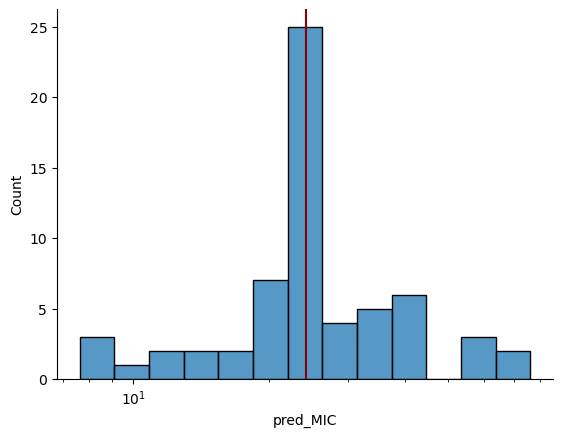

In [20]:
sns.histplot(data=df_reg.query("Lineage != 'MT_H37Rv'"),
             x='pred_MIC',
             log_scale=10
            )

plt.axvline(df_reg.query("Lineage != 'MT_H37Rv'")['pred_MIC'].values[0], color='darkred')

sns.despine()
plt.show()

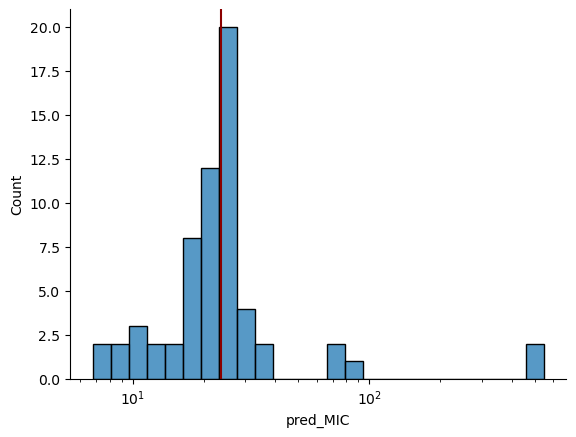

In [21]:
sns.histplot(data=df_CNN.query("Lineage != 'MT_H37Rv'"),
             x='pred_MIC',
             log_scale=10
            )

plt.axvline(df_CNN.query("Lineage != 'MT_H37Rv'")['pred_MIC'].values[0], color='darkred')

sns.despine()
plt.show()

In [42]:
def extract_lineages(df, name_col):

    df_add = []
    
    for sample in df[name_col].unique():

        if os.path.isfile(f"/n/data1/hms/dbmi/farhat/rollingDB/genomic_data/{sample}/lineage/fast_lineage_caller_output.txt"):
        
            F2 = float(pd.read_csv(f"/n/data1/hms/dbmi/farhat/rollingDB/genomic_data/{sample}/lineage/F2_Coll2014.txt", sep='\t', header=None)[0].values[0])
    
            df_flc = pd.read_csv(f"/n/data1/hms/dbmi/farhat/rollingDB/genomic_data/{sample}/lineage/fast_lineage_caller_output.txt", sep='\t')

            df_flc['ROLLINGDB_ID'] = df_flc['Isolate'].str.replace('_variants', '')
            
            for col in df_flc.columns:
                if col not in ['Isolate', 'ROLLINGDB_ID']:
                    df_flc.rename(columns={col: col.capitalize()}, inplace=True)
    
            df_flc['Coll2014'] = df_flc['Coll2014'].str.replace('lineage', '')
            df_flc['F2'] = F2
    
            if df_flc['Coll2014'].values[0][0].isnumeric():
                df_flc['Lineage'] = df_flc['Coll2014'].values[0][0]
            else:
                df_flc['Lineage'] = df_flc['Coll2014'].values[0]
            
            df_add.append(df_flc)
    
    df_add = pd.concat(df_add)
    del df_add['Isolate']
    
    return df_add


In [54]:
df_lineages = extract_lineages(Nabila_samples, 0)
df_lineages.F2.max()

0.0232558139534883

In [26]:
vcfs = []
df_variants_combined = []

for sample in Nabila_samples[0].values:
    fName = f"/n/data1/hms/dbmi/farhat/rollingDB/genomic_data/{sample}/WHO_resistance/{sample}_variants_combinedCodons.eff.vcf"

    if os.path.isfile(fName):
        vcfs.append(fName)

        df_variants = pd.read_csv(fName.replace("_variants_combinedCodons.eff.vcf", "_variants_annot.tsv"), sep='\t')
        df_variants['Sample'] = sample
        df_variants_combined.append(df_variants)

    else:
        print(sample)

df_variants_combined = pd.concat(df_variants_combined)

TB_R43687_WGS_S32_L001
TB_R52719_WGS_S33_L001


In [55]:
df_final = df_variants_combined.merge(df_lineages.rename(columns={'ROLLINGDB_ID': 'Sample'})[['Sample', 'Coll2014', 'Lineage']], how='right')

df_final.set_index(['Sample', 'Coll2014', 'Lineage', 'variant', 'drug', 'confidence']).to_csv("Nabila_45_samples_variants.csv")

In [61]:
df_final.query("FILTER=='Amb'").GENE.unique()

array(['rpoC', 'rrs', 'rrl', 'Rv0678', 'glpK', 'gyrA', 'rpoB', 'rplC',
       'pncA', 'fbiC', 'whiB6', 'ddn'], dtype=object)

In [30]:
for fName in vcfs:
    shutil.copy(fName, os.path.join("./Nabila_VCF", os.path.basename(fName)))

In [5]:
high_unclassified = []

for fName in kraken_files:
    df = pd.read_csv(fName, sep='\t', header=None)

    if df.loc[df[5]=='unclassified'][0].values[0] > 25:
        high_unclassified.append(fName)

In [6]:
# os.listdir()

In [23]:
for thing in high_unclassified:
    sample_id = os.path.basename(os.path.dirname(os.path.dirname(thing)))

    for dir_name in [f'{sample_id}/bam', 'bam', 'pilon', 'WHO_resistance', f'{sample_id}/fastlin', 'lineage']:
        full_dir = f"/n/data1/hms/dbmi/farhat/rollingDB/TRUST/WGS/{sample_id}/{dir_name}"
        if os.path.isdir(full_dir):
            shutil.rmtree(full_dir)

In [14]:
name = 'MFS-179'



/n/data1/hms/dbmi/farhat/rollingDB/TRUST/WGS/MFS-179/MFS-179/bam
/n/data1/hms/dbmi/farhat/rollingDB/TRUST/WGS/MFS-179/bam


In [42]:
FQ_names = glob.glob("/n/data1/hms/dbmi/farhat/fastq_db/TRUST_Illumina/TRUST.SRWGS.FQs.AllSets.RenamedAndLanesMerged/*/*")
samples_with_FQ = np.unique([os.path.basename(fName).split('_')[0] for fName in FQ_names])
len(samples_with_FQ)

635

In [44]:
df = pd.DataFrame({'a': samples_with_FQ, 'b': samples_with_FQ, 'c': 0})

In [46]:
df.loc[df['a'].isin(['MFS-53', 'MFS-270', 'MFS-280'])].to_csv("TRUST_samples_quick.tsv", sep='\t', header=None, index=False)

In [40]:
df.query("a=='MFS-280'")

,a,b,c


In [ ]:
snakemake --snakefile snakefile_2 --use-conda --conda-frontend conda --rerun-incomplete --keep-going --config isolates_to_run="TRUST_samples_quick.tsv" --cores 1 --directory snakemake_small

In [19]:
.to_csv("TRUST_isolates_to_run.tsv", sep='\t', header=None, index=False)

In [23]:
fastq_dir = '/n/data1/hms/dbmi/farhat/fastq_db/TRUST_Illumina/TRUST.SRWGS.FQs.AllSets.RenamedAndLanesMerged/TRUST.SRWGS.FQs.Set3'
FQ_names = glob.glob(f"{fastq_dir}/*")
samples_with_FQ = np.unique([os.path.basename(fName).split('_')[0] for fName in FQ_names])
len(samples_with_FQ)

171

In [28]:
ref_genome = [(seq.id, seq.seq) for seq in SeqIO.parse("references/ref_genome/H37Rv_NC_000962.3.fna", "fasta")]

In [32]:
len(ref_genome[0][1])

4411532

In [ ]:
4411532*2

In [ ]:
# fastq_dir = '/n/data1/hms/dbmi/farhat/fastq_db/TRUST_Illumina/TRUST.SRWGS.FQs.AllSets.RenamedAndLanesMerged/TRUST.SRWGS.FQs.Set3'
# FQ_names = glob.glob(f"{fastq_dir}/*")
# samples_with_FQ = np.unique([os.path.basename(fName).split('_')[0] for fName in FQ_names])
# print(len(samples_with_FQ))

# for i, name in enumerate(samples_with_FQ):
    
#     new_dir = f"/n/scratch/users/s/sak0914/TRUST_FASTQ/{name}"
    
#     if not os.path.isdir(new_dir):
#         os.mkdir(new_dir)

#     if not os.path.isfile(f"{new_dir}/{name}_R1.fastq.gz"):
#         shutil.copy(f"{fastq_dir}/{name}_R1.fastq.gz", f"{new_dir}/{name}_R1.fastq.gz")

#     if not os.path.isfile(f"{new_dir}/{name}_R2.fastq.gz"):
#         shutil.copy(f"{fastq_dir}/{name}_R2.fastq.gz", f"{new_dir}/{name}_R2.fastq.gz")

#     if i % 50 == 0:
#         print(i)

# fastq_dir = '/n/data1/hms/dbmi/farhat/fastq_db/TRUST_Illumina/TRUST.SRWGS.FQs.AllSets.RenamedAndLanesMerged/TRUST.SRWGS.FQs.Set2'
# FQ_names = glob.glob(f"{fastq_dir}/*")
# samples_with_FQ = np.unique([os.path.basename(fName).split('_')[0] for fName in FQ_names])
# print(len(samples_with_FQ))

# for i, name in enumerate(samples_with_FQ):
    
#     new_dir = f"/n/scratch/users/s/sak0914/TRUST_FASTQ/{name}"
    
#     if not os.path.isdir(new_dir):
#         os.mkdir(new_dir)

#     if not os.path.isfile(f"{new_dir}/{name}_R1.fastq.gz"):
#         shutil.copy(f"{fastq_dir}/{name}_R1.fastq.gz", f"{new_dir}/{name}_R1.fastq.gz")

#     if not os.path.isfile(f"{new_dir}/{name}_R2.fastq.gz"):
#         shutil.copy(f"{fastq_dir}/{name}_R2.fastq.gz", f"{new_dir}/{name}_R2.fastq.gz")

#     if i % 50 == 0:
#         print(i)


# fastq_dir = '/n/data1/hms/dbmi/farhat/fastq_db/TRUST_Illumina/TRUST.SRWGS.FQs.AllSets.RenamedAndLanesMerged/TRUST.SRWGS.FQs.Set4'
# FQ_names = glob.glob(f"{fastq_dir}/*")
# samples_with_FQ = np.unique([os.path.basename(fName).split('_')[0] for fName in FQ_names])
# print(len(samples_with_FQ))

# for i, name in enumerate(samples_with_FQ):
    
#     new_dir = f"/n/scratch/users/s/sak0914/TRUST_FASTQ/{name}"
    
#     if not os.path.isdir(new_dir):
#         os.mkdir(new_dir)

#     if not os.path.isfile(f"{new_dir}/{name}_R1.fastq.gz"):
#         shutil.copy(f"{fastq_dir}/{name}_R1.fastq.gz", f"{new_dir}/{name}_R1.fastq.gz")

#     if not os.path.isfile(f"{new_dir}/{name}_R2.fastq.gz"):
#         shutil.copy(f"{fastq_dir}/{name}_R2.fastq.gz", f"{new_dir}/{name}_R2.fastq.gz")

#     if i % 50 == 0:
#         print(i)

In [18]:
for dir_name in glob.glob("/n/data1/hms/dbmi/farhat/rollingDB/TRUST/WGS/*"):
    # shutil.rmtree(dir_name)
    if dir_name != '/n/data1/hms/dbmi/farhat/rollingDB/TRUST/WGS/MFS-1':
        shutil.rmtree(dir_name)

In [3]:
todo_samples = list(set(human_MTBC_human_host['BioSample']) - (set(os.listdir("/n/scratch/users/s/sak0914/smk_output"))))
len(todo_samples)

145440

In [4]:
nonhuman_samples = list(set(human_MTBC_metadata.BioSample) - set(human_MTBC_human_host.BioSample))
len(nonhuman_samples)

6449

In [5]:
for name in nonhuman_samples:
    if name in os.listdir("/n/scratch/users/s/sak0914/smk_output"):
        print(name)

In [6]:
isolates = pd.read_csv("SRA_all/isolates_to_run.tsv", sep='\t', header=None)

In [96]:
count_finished = 0

for name in isolates[0].values:
    if os.path.isfile(f"/n/scratch/users/s/sak0914/smk_output/{name}/pilon/{name}_full.vcf.gz"):
        count_finished += 1

count_finished

949

In [59]:
list(isolates[0].values).index('SAMEA10030115')

379

In [7]:
samples_search = os.listdir("/n/data1/hms/dbmi/farhat/rusham/Spain_Georgia_400_Isolates")

In [8]:
isolate_metadata.query("SAMPLE in @samples_search")

,ROLLINGDB_ID,BIOSAMPLE_ACCESSION,SAMPLE,RUN,DB_OF_ORIGIN,ISOLATION_DATE,ISOLATION_COUNTRY,ISOLATION_REGION,SPUTUM/CULTURE,UNPAIRED/PAIRED,Platform,Model,SPECIES,TaxID,ReleaseDate,LoadDate,Combined_Runs,Num_Runs,OtherNames
70295,SAMN09651725,SAMN09651725,SRS3542704,SRR7516399,NaN,6/30/15,Georgia,Tbilisi,1,1,ILLUMINA,Illumina HiSeq 2500,Mycobacterium tuberculosis,1773.0,2018-07-12 18:17:14,2018-07-12 17:42:23,SRR7516399,1.0,NaN


In [11]:
pd.Series(samples_search).to_csv("Rusham_samples.csv", index=False, header=None)

In [14]:
samples_search_2 = []

for name in samples_search:
    if not name.startswith('ERS') and not name.startswith('SRS'):
        print(name)
    else:
        samples_search_2.append(name)

benchmarks
references
slurm_logs


In [16]:
len(samples_search_2), len(samples_search)

(399, 402)

In [17]:
for name in samples_search_2:
    shutil.rmtree(f"/n/data1/hms/dbmi/farhat/rusham/Spain_Georgia_400_Isolates/{name}")

In [87]:
df_test.shape, human_MTBC_metadata.shape

((151978, 50), (158451, 50))

In [100]:
isolate_metadata.query("ROLLINGDB_ID.str.startswith('YA')")

,ROLLINGDB_ID,BIOSAMPLE_ACCESSION,SAMPLE,RUN,DB_OF_ORIGIN,ISOLATION_DATE,ISOLATION_COUNTRY,ISOLATION_REGION,SPUTUM/CULTURE,UNPAIRED/PAIRED,Platform,Model,SPECIES,TaxID,ReleaseDate,LoadDate,Combined_Runs,Num_Runs,OtherNames
7062,YA00054057,NaN,NaN,NaN,Gandhi,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
7063,YA00054080,NaN,NaN,NaN,Gandhi,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
7064,YA00059555,NaN,NaN,NaN,Gandhi,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
7065,YA00062798,NaN,NaN,NaN,Gandhi,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
7066,YA00069278,NaN,NaN,NaN,Gandhi,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,YA00173818,NaN,NaN,NaN,Gandhi,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
7140,YA00185913,NaN,NaN,NaN,Gandhi,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
7141,YA00185914,NaN,NaN,NaN,Gandhi,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
7142,YA00190161,NaN,NaN,NaN,Gandhi,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
set(human_MTBC_metadata.host.unique()) - set(df_test.host.unique())

{'African Elephant',
 'BADGER',
 'BOVINE',
 'Badger',
 'Beef',
 'Bison',
 'Bison bison athabascae',
 'Bison bonasus',
 'Bobcat',
 'Bos indicus',
 'Bos taurus',
 'Bovine',
 'CERVINE',
 'COW',
 'Canis',
 'Canis lupus familiaris',
 'Canis lupus familiaris,',
 'Capra hircus',
 'Capreolus capreolus',
 'Cattle',
 'Cervid',
 'Cervine',
 'Cervus elaphus',
 'Cheese',
 'Coyote',
 'DEER',
 'Dairy cattle',
 'Dama dama',
 'Dassie',
 'Deer',
 'Elephant',
 'Elephas maximus',
 'Elk',
 'FERRET',
 'Feline',
 'Felis catus',
 'Ferret',
 'Fox',
 'Goat',
 'Hedgehog',
 'Helarctos malayanus',
 'Hydrochoerus hydrochaeris',
 'Jaguar',
 'Lama glama',
 'Loxodonta',
 'Loxodonta africana',
 'Lutra lutra',
 'Lycaon pictus',
 'Macaca fascicularis',
 'Meles meles',
 'Monkey',
 'Mouse',
 'Mus musculus',
 'Opossum',
 'Oryx zoo',
 'Otaria byronia',
 'Ovis aries',
 'PORCINE',
 'POSSUM',
 'Panthera leo',
 'Panthera pardus',
 'Papio',
 'Phacochoerus africanus',
 'Pig',
 'Possum',
 'Primate',
 'Propithecus coquereli',
 'Racc

array(['Homo sapiens', nan, 'Elephas maximus', 'CZ1019-16', 'CZ105-19',
       'CZ139-19', 'CZ149-18', 'CZ178-18', 'CZ188-16', 'CZ188', 'CZ19-15',
       'CZ195', 'CZ217', 'CZ218', 'CZ221', 'CZ222', 'CZ223', 'CZ270',
       'CZ276', 'CZ279-19', 'CZ279', 'CZ280', 'CZ282', 'CZ286', 'CZ29-19',
       'CZ291', 'CZ292', 'CZ297', 'CZ317-15', 'CZ318-15', 'CZ318-19',
       'CZ35-19', 'CZ354-19', 'CZ36-19', 'CZ367-17', 'CZ372-15',
       'CZ388-19', 'CZ389-19', 'CZ395-18', 'CZ398-15', 'CZ402-19',
       'CZ412-18', 'CZ416-15', 'CZ417-15', 'CZ421-17', 'CZ424-18',
       'CZ445-15', 'CZ505-15', 'CZ505-18', 'CZ532-18', 'CZ541-18',
       'CZ614-18', 'CZ628-17', 'CZ732-19', 'CZ757-18', 'CZ772-17',
       'CZ779-16', 'CZ800-17', 'CZ851-17', 'CZ863-17', 'CZ8842', 'CZ8946',
       'CZ895-16', 'CZ9206', 'CZ9320', 'CZ95-17', 'CZ553-17', 'Goat',
       'Homo sapiens sapiens', 'Mycobacterium tuberculosis', 'Bos taurus',
       'Syncerus caffer', 'Meles meles', 'Cervus elaphus', 'Lutra lutra',
       'Ovi

In [10]:
test = human_MTBC_metadata[['BioSample', 'Combined_Runs']].drop_duplicates('BioSample')
test['FASTQ'] = 1

test.iloc[:1000, :].to_csv("SRA_all/isolates_to_run.tsv", sep='\t', header=None, index=False)

In [11]:
pd.read_csv("SRA_all/isolates_to_run.tsv", sep='\t', header=None)

,0,1,2
0,SAMEA10029420,ERR7162974,1
1,SAMEA10029421,ERR7162975,1
2,SAMEA10029424,ERR7162976,1
3,SAMEA10029425,ERR7162977,1
4,SAMEA10029426,ERR7162978,1
...,...,...,...
995,SAMEA104027339,"ERR1950004,ERR1950003",1
996,SAMEA104027340,ERR1950005,1
997,SAMEA104027341,ERR1950006,1
998,SAMEA104027342,ERR1950007,1


In [4]:
test.iloc[:1].to_csv("SRA_all/isolates_to_run.tsv", sep='\t', header=None, index=False)

In [ ]:
/home/sak0914/Mtb_Megapipe

In [26]:
human_MTBC_metadata.to_csv("SRA_all/human_MTBC_metadata.csv.gz", compression='gzip', index=False)

In [99]:
isolate_metadata_All_Mtb_SRA = pd.read_csv("../data_cleaning/isolate_metadata_All_Mtb_SRA.csv")

In [67]:
cass_samples_for_megapipe.columns = ['BioSample', 'Run', 'FASTQ']

In [72]:
cass_samples_for_megapipe = cass_samples_for_megapipe.merge(cass_mapping_table_keep[['BioSample', 'Run', 'Name']], how='left')

In [74]:
cass_samples_for_megapipe.loc[pd.isnull(cass_samples_for_megapipe['Name'])]

,BioSample,Run,FASTQ,Name


In [102]:
isolate_metadata_All_Mtb_SRA.query("BioSample in @cass_mapping_table_keep.BioSample").columns

Index(['BioSample', 'Sample', 'Run', 'strain', 'collected_by',
       'collection_date', 'geo_loc_name', 'host', 'host_disease',
       'isolation_source', 'lat_lon', 'host_health_state', 'sample_name',
       'broker name', 'ReleaseDate', 'LoadDate', 'spots', 'bases',
       'spots_with_mates', 'avgLength', 'size_MB', 'AssemblyName',
       'download_path', 'Experiment', 'LibraryName', 'LibraryStrategy',
       'LibrarySelection', 'LibrarySource', 'LibraryLayout', 'InsertSize',
       'InsertDev', 'Platform', 'Model', 'SRAStudy', 'BioProject',
       'Study_Pubmed_id', 'ProjectID', 'SampleType', 'TaxID', 'ScientificName',
       'SampleName', 'CenterName', 'Submission', 'RunHash', 'ReadHash',
       'collection_date_string', 'country'],
      dtype='object')

In [131]:
cass_metadata = isolate_metadata_All_Mtb_SRA.query("BioSample in @cass_mapping_table_keep.BioSample")[['BioSample', 'Sample', 'Run', 'collection_date_string', 'geo_loc_name', 'country', 'ReleaseDate', 'LoadDate', 'Platform', 'Model', 'TaxID', 'ScientificName',
       'SampleName']].sort_values("SampleName").rename(columns={'geo_loc_name': 'ISOLATION_REGION', 'Sample': 'SAMPLE', 'Run': 'RUN', 'BioSample': 'BIOSAMPLE_ACCESSION', 'SampleName': 'ROLLINGDB_ID', 'ScientificName': 'SPECIES', 'country': 'ISOLATION_COUNTRY', 'collection_date_string': 'ISOLATION_DATE'})

cass_metadata['Combined_Runs'] = cass_metadata['RUN']
cass_metadata[['Num_Runs', 'SPUTUM/CULTURE', 'UNPAIRED/PAIRED']] = 1
cass_metadata['DB_OF_ORIGIN'] = 'CASS'
cass_metadata['OtherNames'] = np.nan

In [133]:
isolate_metadata.head()

,ROLLINGDB_ID,BIOSAMPLE_ACCESSION,SAMPLE,RUN,DB_OF_ORIGIN,ISOLATION_DATE,ISOLATION_COUNTRY,ISOLATION_REGION,SPUTUM/CULTURE,UNPAIRED/PAIRED,Platform,Model,SPECIES,TaxID,ReleaseDate,LoadDate,Combined_Runs,Num_Runs,OtherNames
0,00-R1210,NaN,NaN,NaN,farhat_internal,NaN,Peru,Peru,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
1,01-R0573_ACTTGA_L003,NaN,NaN,NaN,Murray,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
2,01-R0913_TAGCTT_L003,NaN,NaN,NaN,Murray,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
3,01-R0955_GGCTAC_L003,NaN,NaN,NaN,Murray,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
4,01-R1165_CGATGT_L001,NaN,NaN,NaN,Murray,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
isolate_metadata = pd.read_csv("/n/data1/hms/dbmi/farhat/rollingDB/metadata/isolate_metadata.csv")

In [169]:
cass_isolates = isolate_metadata.query("DB_OF_ORIGIN=='CASS'").ROLLINGDB_ID
len(cass_isolates), len(np.unique(cass_isolates))

(361, 361)

In [172]:
isolate_metadata.query("DB_OF_ORIGIN=='CASS'")

,ROLLINGDB_ID,BIOSAMPLE_ACCESSION,SAMPLE,RUN,DB_OF_ORIGIN,ISOLATION_DATE,ISOLATION_COUNTRY,ISOLATION_REGION,SPUTUM/CULTURE,UNPAIRED/PAIRED,Platform,Model,SPECIES,TaxID,ReleaseDate,LoadDate,Combined_Runs,Num_Runs,OtherNames
0,C001,SAMN13813838,SRS5977589,SRR10869296,CASS,2019,South Africa,South Africa,1,1,ILLUMINA,Illumina HiSeq 2500,Mycobacterium tuberculosis,1773.0,4/28/20 13:17,1/10/20 13:34,SRR10869296,1.0,NaN
1,C002,SAMN13813839,SRS5977590,SRR10869295,CASS,2019,South Africa,South Africa,1,1,ILLUMINA,Illumina HiSeq 2500,Mycobacterium tuberculosis,1773.0,4/28/20 13:17,1/10/20 13:35,SRR10869295,1.0,NaN
2,C003,SAMN13813716,SRS5977562,SRR10869323,CASS,2019,South Africa,South Africa,1,1,ILLUMINA,Illumina HiSeq 2500,Mycobacterium tuberculosis,1773.0,4/28/20 13:17,1/10/20 13:35,SRR10869323,1.0,NaN
3,C004,SAMN13813717,SRS5977563,SRR10869322,CASS,2019,South Africa,South Africa,1,1,ILLUMINA,Illumina HiSeq 2500,Mycobacterium tuberculosis,1773.0,4/28/20 13:17,1/10/20 13:36,SRR10869322,1.0,NaN
4,C005,SAMN13813718,SRS5977673,SRR10869211,CASS,2019,South Africa,South Africa,1,1,ILLUMINA,Illumina HiSeq 2500,Mycobacterium tuberculosis,1773.0,4/28/20 13:17,1/10/20 13:33,SRR10869211,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,C479,SAMN13813835,SRS5977585,SRR10869300,CASS,2019,South Africa,South Africa,1,1,ILLUMINA,Illumina HiSeq 2500,Mycobacterium tuberculosis,1773.0,4/28/20 13:17,1/10/20 13:35,SRR10869300,1.0,NaN
357,C480,SAMN13814075,SRS5977852,SRR10869034,CASS,2019,South Africa,South Africa,1,1,ILLUMINA,Illumina HiSeq 2500,Mycobacterium tuberculosis,1773.0,4/28/20 13:17,1/10/20 13:27,SRR10869034,1.0,NaN
358,C482,SAMN13814076,SRS5977853,SRR10869032,CASS,2019,South Africa,South Africa,1,1,ILLUMINA,Illumina HiSeq 2500,Mycobacterium tuberculosis,1773.0,4/28/20 13:17,1/10/20 13:27,SRR10869032,1.0,NaN
359,C485,SAMN13813836,SRS5977587,SRR10869298,CASS,2019,South Africa,South Africa,1,1,ILLUMINA,Illumina HiSeq 2500,Mycobacterium tuberculosis,1773.0,4/28/20 13:17,1/10/20 13:34,SRR10869298,1.0,NaN


In [158]:
cass_samples_for_megapipe.sort_values('Name')[['Name', 'Run', 'FASTQ']].to_csv("/home/sak0914/Mtb_Megapipe/test/CASS_isolates.tsv", sep='\t', header=None, index=False)

In [159]:
cass_samples_for_megapipe.sort_values('Name')[['Name', 'Run', 'FASTQ']]

,Name,Run,FASTQ
333,C001,SRR10869296,1
332,C002,SRR10869295,1
360,C003,SRR10869323,1
359,C004,SRR10869322,1
248,C005,SRR10869211,1
...,...,...,...
337,C479,SRR10869300,1
71,C480,SRR10869034,1
69,C482,SRR10869032,1
335,C485,SRR10869298,1


In [37]:
len(df_MIC_ML.query("DB_OF_ORIGIN=='CASS'").ID), len(cass_mapping_table_keep)

(404, 361)

In [54]:
still_missing = list(set(df_MIC_ML.query("DB_OF_ORIGIN=='CASS'").ID) - set(cass_mapping_table['Sample Name']))
len(still_missing)

58

In [91]:
isolate_metadata.loc[isolate_metadata['ROLLINGDB_ID'].isin(cass_mapping_table_keep['Name']), 'BIOSAMPLE_ACCESSION'] = isolate_metadata['ROLLINGDB_ID'].map(internalName_bioSample_mapping)
isolate_metadata.loc[isolate_metadata['ROLLINGDB_ID'].isin(cass_mapping_table_keep['Name']), 'RUN'] = isolate_metadata['BIOSAMPLE_ACCESSION'].map(bioSample_run_mapping)

In [92]:
isolate_metadata.loc[isolate_metadata['ROLLINGDB_ID'].isin(cass_mapping_table_keep['Name'])]

,ROLLINGDB_ID,BIOSAMPLE_ACCESSION,SAMPLE,RUN,DB_OF_ORIGIN,ISOLATION_DATE,ISOLATION_COUNTRY,ISOLATION_REGION,SPUTUM/CULTURE,UNPAIRED/PAIRED,Platform,Model,SPECIES,TaxID,ReleaseDate,LoadDate,Combined_Runs,Num_Runs,OtherNames
698,C001,SAMN13813838,NaN,SRR10869296,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
699,C002,SAMN13813839,NaN,SRR10869295,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
700,C003,SAMN13813716,NaN,SRR10869323,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
701,C004,SAMN13813717,NaN,SRR10869322,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
702,C005,SAMN13813718,NaN,SRR10869211,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,C479,SAMN13813835,NaN,SRR10869300,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
1055,C480,SAMN13814075,NaN,SRR10869034,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
1056,C482,SAMN13814076,NaN,SRR10869032,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
1057,C485,SAMN13813836,NaN,SRR10869298,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
internalName_bioSample_mapping = dict(zip(cass_mapping_table_keep['Name'], cass_mapping_table_keep['BioSample']))
bioSample_run_mapping = dict(zip(cass_mapping_table_keep['BioSample'], cass_mapping_table_keep['Run']))

In [90]:
len(internalName_bioSample_mapping)

361

In [98]:
cass_mapping_table.iloc[0, :]

Run                                                        SRR10868963
Assay Type                                                         WGS
AvgSpotLen                                                         302
Bases                                                        392746772
BioProject                                                 PRJNA600338
BioSample                                                 SAMN13813815
BioSampleModel                                             Pathogen.cl
Bytes                                                        164614162
Center Name                                                        UCT
collected_by                                                      CLII
Collection_Date                                                   2019
Consent                                                         public
DATASTORE filetype                                    run.zq,fastq,sra
DATASTORE provider                                          gs,ncbi,s3
DATAST

In [94]:
cass_mapping_table.columns

Index(['Run', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioProject', 'BioSample',
       'BioSampleModel', 'Bytes', 'Center Name', 'collected_by',
       'Collection_Date', 'Consent', 'DATASTORE filetype',
       'DATASTORE provider', 'DATASTORE region', 'Experiment',
       'geo_loc_name_country', 'geo_loc_name_country_continent',
       'geo_loc_name', 'Host_disease', 'Host', 'Instrument', 'isolate',
       'isolation_source', 'lat_lon', 'Library Name', 'LibraryLayout',
       'LibrarySelection', 'LibrarySource', 'Organism', 'Platform',
       'ReleaseDate', 'create_date', 'version', 'Sample Name', 'SRA Study',
       'strain'],
      dtype='object')

In [60]:
cass_mapping_table_keep

,BioSample,Run,Name,geo_loc_name_country,geo_loc_name,Instrument,Platform,ReleaseDate,Collection_Date,isolation_source,lat_lon,Organism
0,SAMN13813815,SRR10868963,C439,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019,sputum,33.9249 S 18.4241 E,Mycobacterium tuberculosis
1,SAMN13813814,SRR10868964,C436,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019,sputum,33.9249 S 18.4241 E,Mycobacterium tuberculosis
2,SAMN13813813,SRR10868965,C434,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019,sputum,33.9249 S 18.4241 E,Mycobacterium tuberculosis
3,SAMN13813812,SRR10868966,C433,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019,sputum,33.9249 S 18.4241 E,Mycobacterium tuberculosis
4,SAMN13813811,SRR10868967,C430,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019,sputum,33.9249 S 18.4241 E,Mycobacterium tuberculosis
...,...,...,...,...,...,...,...,...,...,...,...,...
356,SAMN13813817,SRR10869319,C444,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019,sputum,33.9249 S 18.4241 E,Mycobacterium tuberculosis
357,SAMN13813816,SRR10869320,C441,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019,sputum,33.9249 S 18.4241 E,Mycobacterium tuberculosis
358,SAMN13813726,SRR10869321,C096,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019,sputum,33.9249 S 18.4241 E,Mycobacterium tuberculosis
359,SAMN13813717,SRR10869322,C004,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019,sputum,33.9249 S 18.4241 E,Mycobacterium tuberculosis


In [6]:
cass_mapping_table[['BioSample', 'Run', 'Sample Name', 'geo_loc_name_country', 'geo_loc_name', 'Instrument', 'Platform', 'ReleaseDate', 'Collection_Date']]

,BioSample,Run,Sample Name,geo_loc_name_country,geo_loc_name,Instrument,Platform,ReleaseDate,Collection_Date
0,SAMN13813815,SRR10868963,C439,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
1,SAMN13813814,SRR10868964,C436,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
2,SAMN13813813,SRR10868965,C434,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
3,SAMN13813812,SRR10868966,C433,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
4,SAMN13813811,SRR10868967,C430,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
...,...,...,...,...,...,...,...,...,...
356,SAMN13813817,SRR10869319,C444,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
357,SAMN13813816,SRR10869320,C441,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
358,SAMN13813726,SRR10869321,C096,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
359,SAMN13813717,SRR10869322,C004,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019


In [63]:
isolate_metadata.query("DB_OF_ORIGIN=='CASS'").head()

,ROLLINGDB_ID,BIOSAMPLE_ACCESSION,SAMPLE,RUN,DB_OF_ORIGIN,ISOLATION_DATE,ISOLATION_COUNTRY,ISOLATION_REGION,SPUTUM/CULTURE,UNPAIRED/PAIRED,Platform,Model,SPECIES,TaxID,ReleaseDate,LoadDate,Combined_Runs,Num_Runs,OtherNames
698,C001,NaN,NaN,NaN,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
699,C002,NaN,NaN,NaN,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
700,C003,NaN,NaN,NaN,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
701,C004,NaN,NaN,NaN,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN
702,C005,NaN,NaN,NaN,CASS,NaN,NaN,NaN,1,1,NaN,NaN,Mycobacterium tuberculosis,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cass_fastqs = glob.glob(f"/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/C*")
len(cass_fastqs)

313

In [5]:
cass_fastqs_isolates = [os.path.basename(fName) for fName in cass_fastqs]
problem_cass_fastqs = [os.path.basename(fName) for fName in glob.glob(f"/n/data1/hms/dbmi/farhat/rollingDB/problem_fastqs/C*")]

len(cass_fastqs_isolates), len(problem_cass_fastqs)

(313, 54)

In [6]:
cass_mapping_table.loc[cass_mapping_table['Sample Name'].isin(problem_cass_fastqs)][['BioSample', 'Run', 'Sample Name', 'geo_loc_name_country', 'geo_loc_name', 'Instrument', 'Platform', 'ReleaseDate', 'Collection_Date']].shape

(54, 9)

In [7]:
check_fastas = cass_mapping_table.loc[cass_mapping_table['Sample Name'].isin(cass_fastqs_isolates)][['BioSample', 'Run', 'Sample Name', 'geo_loc_name_country', 'geo_loc_name', 'Instrument', 'Platform', 'ReleaseDate', 'Collection_Date']].reset_index(drop=True)

print(check_fastas.shape)

check_fastas.head()

(307, 9)


,BioSample,Run,Sample Name,geo_loc_name_country,geo_loc_name,Instrument,Platform,ReleaseDate,Collection_Date
0,SAMN13813810,SRR10868968,C429,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
1,SAMN13813725,SRR10868973,C094,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
2,SAMN13813804,SRR10868975,C412,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
3,SAMN13813803,SRR10868976,C408,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019
4,SAMN13813802,SRR10868977,C407,South Africa,South Africa,Illumina HiSeq 2500,ILLUMINA,2020-04-28T00:00:00Z,2019


In [8]:
def count_lines(file_path):
    # Use subprocess to call wc -l to count the number of lines in a file
    process = subprocess.Popen(['wc', '-l', file_path], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()

    if process.returncode != 0:
        print(f"Error counting lines in {file_path}: {stderr.decode().strip()}")
        return None

    # Extract and return the line count from the output
    line_count = int(stdout.decode().strip().split()[0])
    return line_count

In [13]:
good_files = []
bad_files = []

for i, row in check_fastas.iterrows():

    internal_id = row['Sample Name']
    run_id = row['Run']

    # if not os.path.isfile(f"/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_1.fastq") or not os.path.isfile(f"/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_2.fastq"):

    #     subprocess.run(f"gunzip -c /n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_R1.fastq.gz > /n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_1.fastq", shell=True)

    #     subprocess.run(f"gunzip -c /n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_R2.fastq.gz > /n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_2.fastq", shell=True)

    # if i % 25 == 0:
    #     print(f"Finished unzipping sample {i}")
        
    F1_LC_internal = count_lines(f"/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_1.fastq")
    F2_LC_internal = count_lines(f"/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_2.fastq")

    if os.path.isfile(f"/n/scratch/users/s/sak0914/smk_output/{internal_id}/{run_id}/{run_id}_1.fastq") and os.path.isfile(f"/n/scratch/users/s/sak0914/smk_output/{internal_id}/{run_id}/{run_id}_2.fastq"):
        
        F1_LC_public = count_lines(f"/n/scratch/users/s/sak0914/smk_output/{internal_id}/{run_id}/{run_id}_1.fastq")
        F2_LC_public = count_lines(f"/n/scratch/users/s/sak0914/smk_output/{internal_id}/{run_id}/{run_id}_2.fastq")

        if F1_LC_internal == F2_LC_internal == F1_LC_public == F2_LC_public:
            good_files.append(run_id)
        else:
            bad_files.append(run_id)

    if i % 50 == 0:
        print(i)

len(good_files), len(bad_files)

0
50
100
150
200
250
300


(304, 3)

In [17]:
bad_files

['SRR10869030', 'SRR10869302', 'SRR10869310']

In [18]:
def remove_headers_FASTQ(fName):
    subprocess.run(f"awk 'NR % 2 == 0' {fName} > {fName.replace('_1', '_noID_1').replace('_2', '_noID_2')}", shell=True)

In [19]:
def compare_files(file1, file2):
    result = subprocess.run(['diff', file1, file2], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    if result.returncode == 0:
        # print("Files are the same.")
        return 0
    else:
        # print("Files are different.")
        return 1

In [20]:
compare_files('/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/C001/C001_noID_1.fastq', '/n/scratch/users/s/sak0914/smk_output/C001/SRR10869296/SRR10869296_noID_1.fastq')

0

In [23]:
compare_files('/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/C429/C429_noID_1.fastq', '/n/scratch/users/s/sak0914/smk_output/C429/SRR10868968/SRR10868968_noID_1.fastq')

1

In [22]:
df_compare_FASTQ

,ID,FQ1,FQ2
0,C429,1,1


In [25]:
df_compare_FASTQ = pd.DataFrame(columns=['ID', 'FQ1', 'FQ2'])

for i, row in check_fastas.iterrows():

    internal_id = row['Sample Name']
    run_id = row['Run']

    if not os.path.isfile(f"/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_noID_1.fastq"):
        remove_headers_FASTQ(f"/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_1.fastq")

    if not os.path.isfile(f"/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_noID_2.fastq"):
        remove_headers_FASTQ(f"/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_2.fastq")
        
    if not os.path.isfile(f"/n/scratch/users/s/sak0914/smk_output/{internal_id}/{run_id}/{run_id}_noID_1.fastq"):
        remove_headers_FASTQ(f"/n/scratch/users/s/sak0914/smk_output/{internal_id}/{run_id}/{run_id}_1.fastq")

    if not os.path.isfile(f"/n/scratch/users/s/sak0914/smk_output/{internal_id}/{run_id}/{run_id}_noID_2.fastq"):
        remove_headers_FASTQ(f"/n/scratch/users/s/sak0914/smk_output/{internal_id}/{run_id}/{run_id}_2.fastq")

    cmp_1 = compare_files(f"/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_noID_1.fastq", f"/n/scratch/users/s/sak0914/smk_output/{internal_id}/{run_id}/{run_id}_noID_1.fastq")

    cmp_2 = compare_files(f"/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/{internal_id}/{internal_id}_noID_2.fastq", f"/n/scratch/users/s/sak0914/smk_output/{internal_id}/{run_id}/{run_id}_noID_2.fastq")
    
    df_compare_FASTQ.loc[i, :] = [internal_id, cmp_1, cmp_2]
    
    if i % 50 == 0:
        print(i)

0



KeyboardInterrupt



In [27]:
# for fName in glob.glob("/n/data1/hms/dbmi/farhat/rollingDB/fastq_db/*/*_noID*"):
#     os.remove(fName)

In [29]:
# for fName in glob.glob("/n/scratch/users/s/sak0914/smk_output/*/*/*_noID*"):
#     os.remove(fName)

In [16]:
cass_mapping_table_for_megapipe = cass_mapping_table[['BioSample', 'Run']]
cass_mapping_table_for_megapipe['FASTQ'] = 1
cass_mapping_table_for_megapipe

,BioSample,Run,FASTQ
0,SAMN13813815,SRR10868963,1
1,SAMN13813814,SRR10868964,1
2,SAMN13813813,SRR10868965,1
3,SAMN13813812,SRR10868966,1
4,SAMN13813811,SRR10868967,1
...,...,...,...
356,SAMN13813817,SRR10869319,1
357,SAMN13813816,SRR10869320,1
358,SAMN13813726,SRR10869321,1
359,SAMN13813717,SRR10869322,1


In [2]:
def compare_fasta_sequences(file1, file2):
    # Read sequences from both files into sets
    sequences1 = {str(record.seq) for record in SeqIO.parse(file1, "fasta")}
    sequences2 = {str(record.seq) for record in SeqIO.parse(file2, "fasta")}
    
    # Compare the sets of sequences
    if sequences1 == sequences2:
        return 0
        
    return 1

In [3]:
diff_fastas = {}
alns_lst = []

for fName in glob.glob("kraken_db/PGAP/*"):
    sample_ID = os.path.basename(fName).split('.')[0]

    fName_2 = fName.replace('PGAP', 'Bakta')
    assert os.path.isfile(fName_2)

    return_val = compare_fasta_sequences(fName, fName_2)

    if return_val == 1:
        print(fName, fName_2)
    
    diff_fastas[sample_ID] = return_val

kraken_db/PGAP/S0085-01.HybridAsm.PGAP.Genome.fasta kraken_db/Bakta/S0085-01.HybridAsm.Bakta.Genome.fasta
kraken_db/PGAP/S0107-01.HybridAsm.PGAP.Genome.fasta kraken_db/Bakta/S0107-01.HybridAsm.Bakta.Genome.fasta


In [4]:
len(os.listdir("kraken_db/PGAP")), len(os.listdir("kraken_db/Bakta"))

(151, 151)

In [5]:
diff_fastas_df = pd.DataFrame(diff_fastas, index=[0]).T.reset_index()
diff_fastas_df.columns = ['sample', 'seq_diff']
diff_fastas_df.shape

(151, 2)

In [6]:
diff_fastas_df.query("seq_diff==1")

,sample,seq_diff
85,S0085-01,1
88,S0107-01,1


In [7]:
sample_id = 'S0085-01'
seq_PGAP = [(seq.id, seq.seq) for seq in SeqIO.parse(f"kraken_db/PGAP/{sample_id}.HybridAsm.PGAP.Genome.fasta", "fasta")]
seq_Bakta = [(seq.id, seq.seq) for seq in SeqIO.parse(f"kraken_db/Bakta/{sample_id}.HybridAsm.Bakta.Genome.fasta", "fasta")]

In [8]:
len(seq_PGAP[0][1]), len(seq_Bakta[0][1])

(4417316, 4417384)

In [18]:
S0085_check = "/n/data1/hms/dbmi/farhat/mm774/Projects/231121.MtbSetV3.151CI.CompleteAndSR.Asms/TRUST_PB_Set1/S0085-01.LR.Asm.fasta"
S0085_check_fastq = [(seq.id, seq.seq) for seq in SeqIO.parse(S0085_check, "fasta")]

S0107_check = "/n/data1/hms/dbmi/farhat/mm774/Projects/231121.MtbSetV3.151CI.CompleteAndSR.Asms/TRUST_PB_Set1/S0107-01.LR.Asm.fasta"
S0107_check_fastq = [(seq.id, seq.seq) for seq in SeqIO.parse(S0107_check, "fasta")]

In [19]:
len(S0085_check_fastq[0][1]), len(S0107_check_fastq[0][1])

(4417384, 4416462)

In [11]:
sample_id = 'S0107-01'
seq_PGAP = [(seq.id, seq.seq) for seq in SeqIO.parse(f"kraken_db/PGAP/{sample_id}.HybridAsm.PGAP.Genome.fasta", "fasta")]
seq_Bakta = [(seq.id, seq.seq) for seq in SeqIO.parse(f"kraken_db/Bakta/{sample_id}.HybridAsm.Bakta.Genome.fasta", "fasta")]

In [12]:
len(seq_PGAP[0][1]), len(seq_Bakta[0][1])

(4416405, 4416462)

# Create BED file to exclude sites with low EBR (refined low confidence) or are within 50 bp of a PE/PPE gene

In [3]:
# exclude_fName_Marin = 'RLC_Regions.Plus.LowPmapK50E4.H37Rv'

# RLC_regions = pd.read_csv(f"references/ref_genome/{exclude_fName_Marin}.bed", sep='\t', header=None)
# RLC_regions.columns = ['CHR', 'BEG', 'END']
# RLC_regions['CHR'] = 'Chromosome'
# len(RLC_regions)

In [135]:
# exclude PE/PPE/PGRS genes, sites with EBR < 0.99, and homoplasic sites from Vargas et al., PNAS 2023 
EBR_fName_Marin = 'EBR_Marin.bedgraph'

df_EBR = pd.read_csv(f"references/ref_genome/{EBR_fName_Marin}", sep='\t', header=None)
df_EBR.columns = ['CHR', 'BEG', 'END', 'EBR']
df_EBR['CHR'] = 'Chromosome'

exclude_genes = H37Rv_regions.query("Name.str.startswith('PE') | Name.str.startswith('PPE') | Name.str.contains('PGRS')").Name.values

PE_PPE_BED_file_df = pd.DataFrame(columns=['CHR', 'BEG', 'END'])

for i, gene in enumerate(exclude_genes):

    # these are 1-indexed inclusive
    gene_start, gene_end = H37Rv_regions.set_index('Name').loc[gene, ['Start', 'Stop']].values

    # BED file is 0-indexed half open interval
    # also extend the range by 50 base pairs on either side
    gene_start = gene_start - 1 - 50
    gene_end = gene_end + 50

    PE_PPE_BED_file_df.loc[i, :] = ['Chromosome', gene_start, gene_end]

homoplasy = pd.read_excel("./references/phylogeny/Vargas_PNAS_2023_homoplasy.xlsx", sheet_name=None)

if len(homoplasy.keys()) == 1:
    homoplasy = homoplasy['Sheet1']

homoplasic_sites_BED_file = pd.DataFrame(columns=['CHR', 'BEG', 'END'])

for i, row in homoplasy.iterrows():
    homoplasic_sites_BED_file.loc[i, :] = ['Chromosome', row['H37Rv Position']-1, row['H37Rv Position']]

BED_file_df = pd.concat([PE_PPE_BED_file_df, df_EBR.query("EBR < 0.99")[['CHR', 'BEG', 'END']], homoplasic_sites_BED_file]).sort_values(["BEG", "END"], ascending=True)
print(len(BED_file_df))

BED_file_df.sort_values(['BEG', 'END']).to_csv("./references/phylogeny/exclude_regions_pre_merge.bed", sep='\t', header=None, index=False)

19924


In [115]:
bedtools merge -i /home/sak0914/Mtb_Megapipe/references/phylogeny/exclude_regions_pre_merge.bed > /home/sak0914/Mtb_Megapipe/references/phylogeny/exclude_regions.bed

19924


In [ ]:
gunzip -c SAMEA3392614_full.vcf.gz | bcftools filter -e "SVTYPE == 'INS' | SVTYPE == 'DEL' | IC > 0 | DC > 0" | bedtools subtract -a '-' -b '/home/sak0914/Mtb_Megapipe/references/phylogeny/exclude_regions_combined.bed' | SnpSift extractFields '-' POS REF ALT FILTER QUAL AF DP BQ MQ -e "" >  /n/scratch/users/s/sak0914/smk_output/SAMEA3392614/lineage/SNP_sites.tsv

In [144]:
pd.read_csv("/home/sak0914/Mtb_Megapipe/references/phylogeny/exclude_regions.bed", sep='\t', header=None)

,0,1,2
0,Chromosome,0,33
1,Chromosome,174,185
2,Chromosome,188,211
3,Chromosome,212,244
4,Chromosome,274,275
...,...,...,...
3770,Chromosome,4408093,4408094
3771,Chromosome,4408919,4408920
3772,Chromosome,4411370,4411400
3773,Chromosome,4411469,4411471


In [152]:
def create_SNP_matrix_from_VCF(isolate, qual_thresh=10, min_read_depth=5, BQ_thresh=20, MQ_thresh=30):

    # for encoding ambiguous alleles as possibly both nucleotides
    iupac_two_nuc_codes = {
                            'AG': 'R',  # Purine (A or G)
                            'CT': 'Y',  # Pyrimidine (C or T)
                            'CG': 'S',  # Strong (C or G)
                            'AT': 'W',  # Weak (A or T)
                            'GT': 'K',  # Keto (G or T)
                            'AC': 'M',  # Amino (A or C),
                            'AA': 'A',  # the following are so that you don't get a key error, but they don't actually need to be merged
                            'CC': 'C',
                            'GG': 'G',
                            'TT': 'T'
                          }
    
    # keep only SNPs (non-length changing variants)
    SNP_sites = pd.read_csv(f"/n/scratch/users/s/sak0914/smk_output/{isolate}/lineage/SNP_sites.tsv.gz", sep='\t', compression='gzip').query("REF.str.len() == ALT.str.len()").drop_duplicates().reset_index(drop=True)
    
    # these are REF alleles
    SNP_sites.loc[SNP_sites['ALT']=='.', 'ALT'] = SNP_sites['REF']

    # Reference
    SNP_sites.loc[(SNP_sites['FILTER'].isin(['PASS', 'Amb'])) &
                  (SNP_sites['QUAL'] >= qual_thresh) &
                  (SNP_sites['DP'] >= min_read_depth) &
                  (SNP_sites['BQ'] >= BQ_thresh) &
                  (SNP_sites['MQ'] >= MQ_thresh) &
                  (SNP_sites['AF'] <= 0.25), 'ALLELE'] = SNP_sites['REF']
    
    # high quality variants
    SNP_sites.loc[(SNP_sites['FILTER']=='PASS') &
                  (SNP_sites['QUAL'] >= qual_thresh) &
                  (SNP_sites['DP'] >= min_read_depth) &
                  (SNP_sites['BQ'] >= BQ_thresh) &
                  (SNP_sites['MQ'] >= MQ_thresh) &
                  (SNP_sites['AF'] > 0.75), 'ALLELE'] = SNP_sites['ALT']
    
    # ambiguous variants -- use the IUPAC codes representing the two nucleotides (REF and ALT) at a given site
    # faster to not apply it to all rows, only on the ones you need
    SNP_sites.loc[(SNP_sites['FILTER']=='Amb') &
                  (SNP_sites['QUAL'] >= qual_thresh) &
                  (SNP_sites['DP'] >= min_read_depth) &
                  (SNP_sites['BQ'] >= BQ_thresh) &
                  (SNP_sites['MQ'] >= MQ_thresh) &
                  (SNP_sites['AF'] > 0.25), 'ALLELE'] = SNP_sites.loc[(SNP_sites['FILTER']=='Amb') &
                                                                      (SNP_sites['QUAL'] >= qual_thresh) &
                                                                      (SNP_sites['DP'] >= min_read_depth) &
                                                                      (SNP_sites['BQ'] >= BQ_thresh) &
                                                                      (SNP_sites['MQ'] >= MQ_thresh) &
                                                                      (SNP_sites['AF'] > 0.25)].apply(lambda row: iupac_two_nuc_codes.get(''.join(sorted(row['REF'] + row['ALT'])), np.nan), axis=1)
    
    # fill the rest with N = no information
    # this includes low coverage sites because we don't know what's happening there, so in the absence of other information, it could be anything
    # also includes areas with deletions -- those shouldn't be REF, technically they are '-', which is treated the same as N
    # gap characters ('-') and Ns are treated the same in iqtree
    SNP_sites['ALLELE'] = SNP_sites['ALLELE'].fillna('N')
    
    SNP_sites['ISOLATE'] = isolate

    # return a pivoted matrix
    return SNP_sites.pivot(index='ISOLATE', columns='POS', values='ALLELE')

In [165]:
SNP_matrix_full = []

for isolate in os.listdir("/n/scratch/users/s/sak0914/smk_output"):

    SNP_fName = f"/n/scratch/users/s/sak0914/smk_output/{isolate}/lineage/SNP_sites.tsv.gz"
    
    if os.path.isfile(SNP_fName):
        SNP_matrix = create_SNP_matrix_from_VCF(isolate)
        SNP_matrix_full.append(SNP_matrix)

SNP_matrix_full = pd.concat(SNP_matrix_full)

In [166]:
SNP_matrix_full

POS,34,35,36,37,38,39,40,41,42,43,...,4411523,4411524,4411525,4411526,4411527,4411528,4411529,4411530,4411531,4411532
ISOLATE,,,,,,,,,,,,,,,,,,,,,
00-R1210,G,T,G,T,G,G,A,A,C,G,...,A,G,A,T,A,C,G,T,C,G
SAMEA3392614,G,T,G,T,G,G,A,A,C,G,...,A,G,A,T,A,C,G,T,C,G
SAMEA8741574,G,T,G,T,G,G,A,A,C,G,...,A,G,A,T,A,C,G,T,C,G


In [169]:
# remove sites that are the same across all isolates because they have no signal
SNP_matrix_no_constant = SNP_matrix_full.loc[:, SNP_matrix_full.nunique(dropna=False) > 1]
SNP_matrix_no_constant.shape

(3, 56550)

In [170]:
SNP_matrix_no_constant

POS,1452,1849,4348,4349,4350,4351,4352,4353,4354,4355,...,4397736,4400246,4401732,4404346,4404960,4406116,4407200,4407588,4407927,4408923
ISOLATE,,,,,,,,,,,,,,,,,,,,,
00-R1210,T,C,N,N,N,N,N,N,N,N,...,C,A,C,T,C,C,G,T,T,C
SAMEA3392614,G,A,G,A,G,G,A,T,A,T,...,T,G,A,C,C,C,A,C,G,T
SAMEA8741574,G,C,G,A,G,G,A,T,A,T,...,C,G,C,C,G,A,A,T,T,C


In [ ]:
# remove sites where more than 10% of isolates have Ns -- this is a param that can be changed by the user

In [21]:
glob.glob("kraken_db/BAKTA/*")[0]

'kraken_db/BAKTA/01_R1134.HybridAsm.Bakta.Genome.fasta'

In [22]:
glob.glob("kraken_db/PGAP/*")[0]

'kraken_db/PGAP/01_R1134.HybridAsm.PGAP.Genome.fasta'

In [19]:
fName.replace('PGAP', 'BAKTA')

'kraken_db/BAKTA/01_R1134.HybridAsm.BAKTA.Genome.fasta'

In [14]:
# Example usage
compare_fasta_sequences("kraken_db/01_R1134.HybridAsm.Bakta.Genome.fasta", "kraken_db/01_R1134.HybridAsm.PGAP.Genome.fasta")

The sequences in the two FASTA files are the same.


In [2]:
todo_isolates = pd.read_csv("../data_cleaning/samples_for_F2.txt", header=None, sep='\t')
todo_isolates.shape

(4319, 1)

In [4]:
todo_isolates.loc[todo_isolates[0]=='SAMN37457963']

,0
3863,SAMN37457963


In [ ]:
python3 MtbQuantCNN/data_processing/variant_calling/F2_calculation.py data_cleaning/samples_for_F2.txt /n/data1/hms/dbmi/farhat/rollingDB/genomic_data